In [8]:
import numpy as np
import sys
import matplotlib.pyplot as plt

# itt kell megadni a fájlneveket amikben a gráfok vannak
gs = ["G8", "G52", "G202", "Ger.txt"]

# megoldásokat tartalmazó fájlok nevei
# egy gráfhoz több megoldást is fel lehet sorolni
ms = [
        ["M8_1", "M8_2", "M8_3", "M8_4", "G8_mtrails.txt"],
        ["G52_mtrails.txt"],
        ["G202_mtrails.txt"],
        ["Ger_mtrails.txt"]
]

graph = gs[0]
mtrail = ms[0][1]
    
with open(graph) as ing:
    n=int(ing.readline().rstrip())
    A=[]
    for _ in range(n):
        A.append(map(int,ing.readline().rstrip().split()))
    B=[]
    for _ in range(n):
        B.append(map(int,ing.readline().rstrip().split()))
    m=len(B[0])
    P=[]
    for _ in range(n):
        P.append(map(float,ing.readline().rstrip().split()))

with open(mtrail) as inm:
    neptuns=inm.readline().rstrip().split()
    M=[]
    for _ in range(m):
        M.append(map(int,inm.readline().rstrip().split()))

A=np.array(A)
B=np.array(B)
M=np.array(M)

b_=True
for i in range(m):
    if (M[i]==[0]*len(M[i])).all():
        b_=False
        break
    for j in range(i+1,m):
        if (M[i]==M[j]).all():
            b_=False
            break
    if not b_:
        break
if not b_:
    print >> sys.stderr, 'wrong m-trails'

noc=0
for i in range(len(M[0])):
    M_=np.array([x[i] for x in M])
    B_=B[:,np.where(M_==1)[0]]
#    print B_
#    B_=np.array([B[x] for x in range(m) if M_[x]==1])
    B_=np.array([x for x in B_ if (x != [0]*len(x)).any()])
#    print M_, B_
    r=np.linalg.matrix_rank(B_)
#    print r
    noc+=len(B_)-r
print noc


7


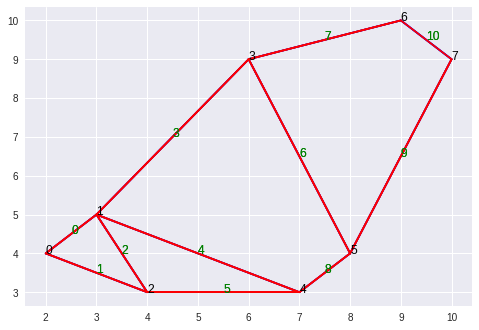

In [9]:
with open(graph) as ing:
    n=int(ing.readline().rstrip())
    A=[]
    for _ in range(n):
        A.append(map(int,ing.readline().rstrip().split()))
    B=[]
    for _ in range(n):
        B.append(map(int,ing.readline().rstrip().split()))
    m=len(B[0])
    P=[]
    for _ in range(n):
        P.append(map(float,ing.readline().rstrip().split()))

    
for i in range(n):
    for j in range(n):
        if A[i][j]==1:
            plt.plot([P[i][0],P[j][0]],[P[i][1],P[j][1]],'b')

if mtrail:
    with open(mtrail) as inm:
        neptuns=inm.readline().rstrip().split()
        M=[]
        for _ in range(m):
            M.append(map(int,inm.readline().rstrip().split()))
    
    lis=range(len(M[0]))
    
    for m_col in range(0, len(M[0])):
        lis=[m_col]
        for i in lis:
            for j in range(len(M)):
                if M[j][i]==1:
                    u=0
                    v=0
                    for k in range(n):
                        if B[k][j]==1:
                            u=k
                        elif B[k][j]==-1:
                            v=k
                    plt.plot([P[u][0],P[v][0]],[P[u][1],P[v][1]],'r')

for i in range(n):
    plt.text(P[i][0],P[i][1],str(i), color='black')

for j in range(len(B[0])):
    for i1 in range(n):
        for i2 in range(n):
            if B[i1][j]!=0 and B[i2][j]!=0 and i1!= i2:
                plt.text( float(P[i1][0]+P[i2][0])/2  ,  float(P[i1][1]+P[i2][1])/2, str(j), color='green'  )

plt.show()
